In [1]:
import yfinance as yf   
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use("cyberpunk")


In [2]:
ticker = "BTC-USD"
dados = yf.download(ticker, auto_adjust=False)
dados = dados.dropna()
dados = dados.droplevel(1, axis=1)
dados

[*********************100%***********************]  1 of 1 completed


Price          Adj Close         Close          High           Low  \
Date                                                                 
2014-09-17    457.334015    457.334015    468.174011    452.421997   
2014-09-18    424.440002    424.440002    456.859985    413.104004   
2014-09-19    394.795990    394.795990    427.834991    384.532013   
2014-09-20    408.903992    408.903992    423.295990    389.882996   
2014-09-21    398.821014    398.821014    412.425995    393.181000   
...                  ...           ...           ...           ...   
2025-02-28  84373.007812  84373.007812  85036.320312  78248.914062   
2025-03-01  86031.914062  86031.914062  86522.304688  83794.234375   
2025-03-02  94248.351562  94248.351562  95043.437500  85040.210938   
2025-03-03  86065.671875  86065.671875  94429.750000  85081.304688   
2025-03-04  85562.421875  85562.421875  86437.671875  81947.640625   

Price               Open       Volume  
Date                                   
2014-09-17    465.864014     21056800  
2014-09-18    456.859985     34483200  
2014-09-19    424.102997     37919700  
2014-09-20    394.673004     36863600  
2014-09-21    408.084991     26580100  
...                  ...          ...  
2025-02-28  84705.625000  83610570576  
2025-03-01  84373.867188  29190628396  
2025-03-02  86036.257812  58398341092  
2025-03-03  94248.421875  70072228536  
2025-03-04  86137.492188  73661063168  

[3822 rows x 6 columns]

Preparar e calcular dados importantes para o modelo

In [3]:
dados["retorno"] = dados.Close.pct_change()
dados_retornos_completos = dados.retorno
dados_retornos_completos

Date
2014-09-17         NaN
2014-09-18   -0.071926
2014-09-19   -0.069843
2014-09-20    0.035735
2014-09-21   -0.024659
                ...   
2025-02-28   -0.003910
2025-03-01    0.019662
2025-03-02    0.095505
2025-03-03   -0.086820
2025-03-04   -0.005847
Name: retorno, Length: 3822, dtype: float64

In [4]:
dados["media_maxima"] = dados.High.rolling(window=20).mean(20)
dados["media_minima"] = dados.Low.rolling(window=20).mean(20)
dados.head(30)

Price        Adj Close       Close        High         Low        Open  \
Date                                                                     
2014-09-17  457.334015  457.334015  468.174011  452.421997  465.864014   
2014-09-18  424.440002  424.440002  456.859985  413.104004  456.859985   
2014-09-19  394.795990  394.795990  427.834991  384.532013  424.102997   
2014-09-20  408.903992  408.903992  423.295990  389.882996  394.673004   
2014-09-21  398.821014  398.821014  412.425995  393.181000  408.084991   
2014-09-22  402.152008  402.152008  406.915985  397.130005  399.100006   
2014-09-23  435.790985  435.790985  441.557007  396.196991  402.092010   
2014-09-24  423.204987  423.204987  436.112000  421.131989  435.751007   
2014-09-25  411.574005  411.574005  423.519989  409.467987  423.156006   
2014-09-26  404.424988  404.424988  414.937988  400.009003  411.428986   
2014-09-27  399.519989  399.519989  406.622986  397.372009  403.556000   
2014-09-28  377.181000  377.181000  401.016998  374.332001  399.471008   
2014-09-29  375.467010  375.467010  385.210999  372.239990  376.928009   
2014-09-30  386.944000  386.944000  390.976990  373.442993  376.088013   
2014-10-01  383.614990  383.614990  391.378998  380.779999  387.427002   
2014-10-02  375.071991  375.071991  385.497009  372.946014  383.988007   
2014-10-03  359.511993  359.511993  377.695007  357.859009  375.181000   
2014-10-04  328.865997  328.865997  364.487000  325.885986  359.891998   
2014-10-05  320.510010  320.510010  341.800995  289.295990  328.915985   
2014-10-06  330.079010  330.079010  345.134003  302.559998  320.389008   
2014-10-07  336.187012  336.187012  339.247009  320.481995  330.584015   
2014-10-08  352.940002  352.940002  354.364014  327.187988  336.115997   
2014-10-09  365.026001  365.026001  382.726013  347.687012  352.747986   
2014-10-10  361.562012  361.562012  375.066986  352.963013  364.687012   
2014-10-11  362.299011  362.299011  367.191010  355.950989  361.362000   
2014-10-12  378.549011  378.549011  379.433014  356.144012  362.605988   
2014-10-13  390.414001  390.414001  397.226013  368.897003  377.920990   
2014-10-14  400.869995  400.869995  411.697998  391.324005  391.691986   
2014-10-15  394.773010  394.773010  402.226990  388.765991  400.954987   
2014-10-16  382.556000  382.556000  398.807007  373.070007  394.518005   

Price         Volume   retorno  media_maxima  media_minima  
Date                                                        
2014-09-17  21056800       NaN           NaN           NaN  
2014-09-18  34483200 -0.071926           NaN           NaN  
2014-09-19  37919700 -0.069843           NaN           NaN  
2014-09-20  36863600  0.035735           NaN           NaN  
2014-09-21  26580100 -0.024659           NaN           NaN  
2014-09-22  24127600  0.008352           NaN           NaN  
2014-09-23  45099500  0.083647           NaN           NaN  
2014-09-24  30627700 -0.028881           NaN           NaN  
2014-09-25  26814400 -0.027483           NaN           NaN  
2014-09-26  21460800 -0.017370           NaN           NaN  
2014-09-27  15029300 -0.012128           NaN           NaN  
2014-09-28  23613300 -0.055915           NaN           NaN  
2014-09-29  32497700 -0.004544           NaN           NaN  
2014-09-30  34707300  0.030567           NaN           NaN  
2014-10-01  26229400 -0.008603           NaN           NaN  
2014-10-02  21777700 -0.022270           NaN           NaN  
2014-10-03  30901200 -0.041485           NaN           NaN  
2014-10-04  47236500 -0.085243           NaN           NaN  
2014-10-05  83308096 -0.025408           NaN           NaN  
2014-10-06  79011800  0.029856    405.072746    380.188599  
2014-10-07  49199900  0.018505    398.626396    373.591599  
2014-10-08  54736300  0.049832    393.501598    369.295798  
2014-10-09  83641104  0.034244    391.246149    367.453548  
2014-10-10  43665700 -0.009490    388.834698    365.607549  
2014-10-11  13345200  0.002038    386.572949 

Gerar sinais de compra

In [5]:
dados["sinal_compra"] = 0
dados.sinal_compra = (dados.Close > dados.media_maxima).astype(int)
dados

Price          Adj Close         Close          High           Low  \
Date                                                                 
2014-09-17    457.334015    457.334015    468.174011    452.421997   
2014-09-18    424.440002    424.440002    456.859985    413.104004   
2014-09-19    394.795990    394.795990    427.834991    384.532013   
2014-09-20    408.903992    408.903992    423.295990    389.882996   
2014-09-21    398.821014    398.821014    412.425995    393.181000   
...                  ...           ...           ...           ...   
2025-02-28  84373.007812  84373.007812  85036.320312  78248.914062   
2025-03-01  86031.914062  86031.914062  86522.304688  83794.234375   
2025-03-02  94248.351562  94248.351562  95043.437500  85040.210938   
2025-03-03  86065.671875  86065.671875  94429.750000  85081.304688   
2025-03-04  85562.421875  85562.421875  86437.671875  81947.640625   

Price               Open       Volume   retorno  media_maxima  media_minima  \
Date                                                                          
2014-09-17    465.864014     21056800       NaN           NaN           NaN   
2014-09-18    456.859985     34483200 -0.071926           NaN           NaN   
2014-09-19    424.102997     37919700 -0.069843           NaN           NaN   
2014-09-20    394.673004     36863600  0.035735           NaN           NaN   
2014-09-21    408.084991     26580100 -0.024659           NaN           NaN   
...                  ...          ...       ...           ...           ...   
2025-02-28  84705.625000  83610570576 -0.003910  95887.094531  92541.878125   
2025-03-01  84373.867188  29190628396  0.019662  95346.945703  91994.326953   
2025-03-02  86036.257812  58398341092  0.095505  95182.456641  91480.295313   
2025-03-03  94248.421875  70072228536 -0.086820  94979.299219  90990.608594   
2025-03-04  86137.492188  73661063168 -0.005847  94393.631641  90382.930469   

Price       sinal_compra  
Date                      
2014-09-17             0  
2014-09-18             0  
2014-09-19             0  
2014-09-20             0  
2014-09-21             0  
...                  ...  
2025-02-28             0  
2025-03-01             0  
2025-03-02             0  
2025-03-03             0  
2025-03-04             0  

[3822 rows x 10 columns]

Gerar sinais de venda

In [6]:
dados["sinal_venda"] = 0
dados.sinal_venda = (dados.Close < dados.media_minima).astype(int)
dados

Price          Adj Close         Close          High           Low  \
Date                                                                 
2014-09-17    457.334015    457.334015    468.174011    452.421997   
2014-09-18    424.440002    424.440002    456.859985    413.104004   
2014-09-19    394.795990    394.795990    427.834991    384.532013   
2014-09-20    408.903992    408.903992    423.295990    389.882996   
2014-09-21    398.821014    398.821014    412.425995    393.181000   
...                  ...           ...           ...           ...   
2025-02-28  84373.007812  84373.007812  85036.320312  78248.914062   
2025-03-01  86031.914062  86031.914062  86522.304688  83794.234375   
2025-03-02  94248.351562  94248.351562  95043.437500  85040.210938   
2025-03-03  86065.671875  86065.671875  94429.750000  85081.304688   
2025-03-04  85562.421875  85562.421875  86437.671875  81947.640625   

Price               Open       Volume   retorno  media_maxima  media_minima  \
Date                                                                          
2014-09-17    465.864014     21056800       NaN           NaN           NaN   
2014-09-18    456.859985     34483200 -0.071926           NaN           NaN   
2014-09-19    424.102997     37919700 -0.069843           NaN           NaN   
2014-09-20    394.673004     36863600  0.035735           NaN           NaN   
2014-09-21    408.084991     26580100 -0.024659           NaN           NaN   
...                  ...          ...       ...           ...           ...   
2025-02-28  84705.625000  83610570576 -0.003910  95887.094531  92541.878125   
2025-03-01  84373.867188  29190628396  0.019662  95346.945703  91994.326953   
2025-03-02  86036.257812  58398341092  0.095505  95182.456641  91480.295313   
2025-03-03  94248.421875  70072228536 -0.086820  94979.299219  90990.608594   
2025-03-04  86137.492188  73661063168 -0.005847  94393.631641  90382.930469   

Price       sinal_compra  sinal_venda  
Date                                   
2014-09-17             0            0  
2014-09-18             0            0  
2014-09-19             0            0  
2014-09-20             0            0  
2014-09-21             0            0  
...                  ...          ...  
2025-02-28             0            1  
2025-03-01             0            1  
2025-03-02             0            0  
2025-03-03             0            1  
2025-03-04             0            1  

[3822 rows x 11 columns]

Gerar Operacoes

In [7]:
dados["posicao"] = 0

In [8]:
len(dados)

3822

In [9]:
for linha in range(1,len(dados)):

    ## sinal de compra
    if dados.sinal_compra.iloc[linha] == 1:
        dados.posicao.iloc[linha] = 1
    
    ## sinal de venda
    elif dados.sinal_venda.iloc[linha] == 1:
        dados.posicao.iloc[linha] = 0
    
    ## sem sinal
    else:
        if (dados.posicao.iloc[linha - 1] == 1) and (dados.sinal_venda.iloc[linha] == 0): 
            dados.posicao.iloc[linha] = 1
        
        else:
            dados.posicao.iloc[linha] = 0


dados                  

C:\Users\andre\AppData\Local\Temp\ipykernel_18360\4103073224.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dados.posicao.iloc[linha] = 0
C:\Users\andre\AppData\Local\Temp\ipykernel_18360\4103073224.py:17: SettingWithCopyWarning: 
A va

Price          Adj Close         Close          High           Low  \
Date                                                                 
2014-09-17    457.334015    457.334015    468.174011    452.421997   
2014-09-18    424.440002    424.440002    456.859985    413.104004   
2014-09-19    394.795990    394.795990    427.834991    384.532013   
2014-09-20    408.903992    408.903992    423.295990    389.882996   
2014-09-21    398.821014    398.821014    412.425995    393.181000   
...                  ...           ...           ...           ...   
2025-02-28  84373.007812  84373.007812  85036.320312  78248.914062   
2025-03-01  86031.914062  86031.914062  86522.304688  83794.234375   
2025-03-02  94248.351562  94248.351562  95043.437500  85040.210938   
2025-03-03  86065.671875  86065.671875  94429.750000  85081.304688   
2025-03-04  85562.421875  85562.421875  86437.671875  81947.640625   

Price               Open       Volume   retorno  media_maxima  media_minima  \
Date                                                                          
2014-09-17    465.864014     21056800       NaN           NaN           NaN   
2014-09-18    456.859985     34483200 -0.071926           NaN           NaN   
2014-09-19    424.102997     37919700 -0.069843           NaN           NaN   
2014-09-20    394.673004     36863600  0.035735           NaN           NaN   
2014-09-21    408.084991     26580100 -0.024659           NaN           NaN   
...                  ...          ...       ...           ...           ...   
2025-02-28  84705.625000  83610570576 -0.003910  95887.094531  92541.878125   
2025-03-01  84373.867188  29190628396  0.019662  95346.945703  91994.326953   
2025-03-02  86036.257812  58398341092  0.095505  95182.456641  91480.295313   
2025-03-03  94248.421875  70072228536 -0.086820  94979.299219  90990.608594   
2025-03-04  86137.492188  73661063168 -0.005847  94393.631641  90382.930469   

Price       sinal_compra  sinal_venda  posicao  
Date                                            
2014-09-17             0            0        0  
2014-09-18             0            0        0  
2014-09-19             0            0        0  
2014-09-20             0            0        0  
2014-09-21             0            0        0  
...                  ...          ...      ...  
2025-02-28             0            1        0  
2025-03-01             0            1        0  
2025-03-02             0            0        0  
2025-03-03             0            1        0  
2025-03-04             0            1        0  

[3822 rows x 12 columns]

In [10]:
dados.posicao = dados.posicao.shift()
dados

Price          Adj Close         Close          High           Low  \
Date                                                                 
2014-09-17    457.334015    457.334015    468.174011    452.421997   
2014-09-18    424.440002    424.440002    456.859985    413.104004   
2014-09-19    394.795990    394.795990    427.834991    384.532013   
2014-09-20    408.903992    408.903992    423.295990    389.882996   
2014-09-21    398.821014    398.821014    412.425995    393.181000   
...                  ...           ...           ...           ...   
2025-02-28  84373.007812  84373.007812  85036.320312  78248.914062   
2025-03-01  86031.914062  86031.914062  86522.304688  83794.234375   
2025-03-02  94248.351562  94248.351562  95043.437500  85040.210938   
2025-03-03  86065.671875  86065.671875  94429.750000  85081.304688   
2025-03-04  85562.421875  85562.421875  86437.671875  81947.640625   

Price               Open       Volume   retorno  media_maxima  media_minima  \
Date                                                                          
2014-09-17    465.864014     21056800       NaN           NaN           NaN   
2014-09-18    456.859985     34483200 -0.071926           NaN           NaN   
2014-09-19    424.102997     37919700 -0.069843           NaN           NaN   
2014-09-20    394.673004     36863600  0.035735           NaN           NaN   
2014-09-21    408.084991     26580100 -0.024659           NaN           NaN   
...                  ...          ...       ...           ...           ...   
2025-02-28  84705.625000  83610570576 -0.003910  95887.094531  92541.878125   
2025-03-01  84373.867188  29190628396  0.019662  95346.945703  91994.326953   
2025-03-02  86036.257812  58398341092  0.095505  95182.456641  91480.295313   
2025-03-03  94248.421875  70072228536 -0.086820  94979.299219  90990.608594   
2025-03-04  86137.492188  73661063168 -0.005847  94393.631641  90382.930469   

Price       sinal_compra  sinal_venda  posicao  
Date                                            
2014-09-17             0            0      NaN  
2014-09-18             0            0      0.0  
2014-09-19             0            0      0.0  
2014-09-20             0            0      0.0  
2014-09-21             0            0      0.0  
...                  ...          ...      ...  
2025-02-28             0            1      0.0  
2025-03-01             0            1      0.0  
2025-03-02             0            0      0.0  
2025-03-03             0            1      0.0  
2025-03-04             0            1      0.0  

[3822 rows x 12 columns]

Criar um ID para todos os trades historicos da tabela
- Agrupar todos os trades atraves de ID

In [11]:
dados["trades"] = (dados.posicao != dados.posicao.shift()).cumsum()
dados.trades = dados.trades.where(dados.posicao == 1)
dados = dados.dropna(subset = "trades")
dados.tail(50)

Price           Adj Close          Close           High            Low  \
Date                                                                     
2024-11-21   98504.726562   98504.726562   99014.218750   94132.601562   
2024-11-22   98997.664062   98997.664062   99655.500000   97222.664062   
2024-11-23   97777.281250   97777.281250   99014.679688   97232.890625   
2024-11-24   98013.820312   98013.820312   98647.179688   95788.078125   
2024-11-25   93102.296875   93102.296875   98935.031250   92642.914062   
2024-11-26   91985.320312   91985.320312   94991.750000   90770.812500   
2024-11-27   95962.531250   95962.531250   97361.179688   91778.664062   
2024-11-28   95652.468750   95652.468750   96650.203125   94677.351562   
2024-11-29   97461.523438   97461.523438   98693.171875   95407.882812   
2024-11-30   96449.054688   96449.054688   97499.343750   96144.218750   
2024-12-01   97279.789062   97279.789062   97888.125000   95770.187500   
2024-12-02   95865.304688   95865.304688   98152.601562   94482.867188   
2024-12-03   96002.164062   96002.164062   96297.203125   93629.562500   
2024-12-04   98768.531250   98768.531250   99207.328125   94660.523438   
2024-12-05   96593.570312   96593.570312  103900.468750   91998.781250   
2024-12-06   99920.710938   99920.710938  102039.882812   96514.875000   
2024-12-07   99923.335938   99923.335938  100563.382812   99030.882812   
2024-12-08  101236.015625  101236.015625  101399.992188   98771.515625   
2024-12-09   97432.718750   97432.718750  101272.507812   94355.914062   
2024-12-10   96675.429688   96675.429688   98270.156250   94321.257812   
2024-12-11  101173.031250  101173.031250  101913.359375   95747.226562   
2024-12-12  100043.000000  100043.000000  102524.914062   99339.953125   
2024-12-13  101459.257812  101459.257812  101888.804688   99233.281250   
2024-12-14  101372.968750  101372.968750  102618.882812  100634.054688   
2024-12-15  104298.695312  104298.695312  105047.539062  101227.031250   
2024-12-16  106029.718750  106029.718750  107780.578125  103322.984375   
2024-12-17  106140.601562  106140.601562  108268.445312  105291.734375   
2024-12-18  100041.539062  100041.539062  106470.609375  100041.539062   
2024-12-19   97490.953125   97490.953125  102748.148438   95587.679688   
2025-01-07   96922.703125   96922.703125  102712.484375   96132.875000   
2025-01-08   95043.523438   95043.523438   97258.320312   92525.843750   
2025-01-09   92484.039062   92484.039062   95349.718750   91220.843750   
2025-01-16   99756.906250   99756.906250  100781.585938   97364.445312   
2025-01-17  104462.039062  104462.039062  105884.226562   99948.906250   
2025-01-18  104408.070312  104408.070312  104913.203125  102226.617188   
2025-01-19  101089.609375  101089.609375  106299.796875   99570.531250   
2025-01-20  102016.664062  102016.664062  109114.882812   99471.359375   
2025-01-21  106146.265625  106146.265625  107180.921875  100103.953125   
2025-01-22  103653.070312  103653.070312  106294.343750  103360.265625   
2025-01-23  103960.171875  103960.171875  106820.328125  101257.804688   
2025-01-24  104819.484375  104819.484375  107098.546875  102772.125000   
2025-01-25  104714.648438  104714.648438  105243.789062  104120.375000   
2025-01-26  102682.500000  102682.500000  105438.648438  102507.710938   
2025-01-27  102087.687500  102087.687500  103214.109375   97795.937500   
2025-01-28  101332.476562  101332.476562  103730.820312  100238.187500   
2025-01-29  103703.210938  103703.210938  104750.804688  101283.820312   
2025-01-30  104735.304688  104735.304688  106418.765625  103321.648438   
2025-01-31  102405.023438  102405.023438  106026.351562  101543.882812   
2025-02-01  100655.906250  100655.906250  102755.726562  100297.710938   
2025-02-02   97688.976562   97688.976562  101430.664062   96216.078125   

Price                Open        Volume   retorno   media_maxima  \
Date                                                               
2024-11-21   94

Calcular retorno de todos os trades

In [12]:
df_retorno_acumulado = (1 + dados.retorno).cumprod()-1
df_retorno_acumulado

Date
2014-10-14      0.026782
2014-10-15      0.011165
2014-10-16     -0.020127
2014-10-17     -0.017049
2014-10-18      0.002633
                 ...    
2025-01-29    341.647958
2025-01-30    345.058121
2025-01-31    337.358590
2025-02-01    331.579295
2025-02-02    321.776200
Name: retorno, Length: 2138, dtype: float64

In [13]:
dados_retorno_btc = (1 + dados_retornos_completos).cumprod()-1
dados_retorno_btc

Date
2014-09-17           NaN
2014-09-18     -0.071926
2014-09-19     -0.136745
2014-09-20     -0.105896
2014-09-21     -0.127944
                 ...    
2025-02-28    183.488809
2025-03-01    187.116150
2025-03-02    205.082094
2025-03-03    187.189964
2025-03-04    186.089565
Name: retorno, Length: 3822, dtype: float64

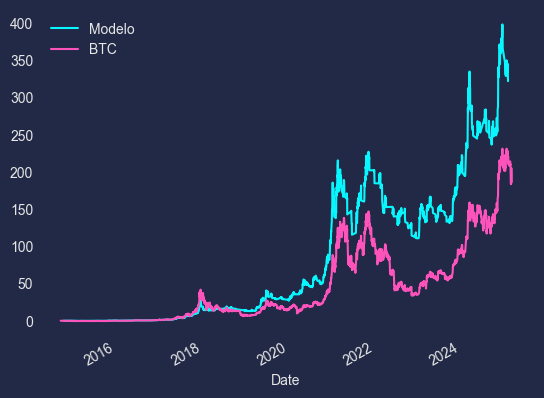

In [14]:
df_retorno_acumulado.plot(label = "Modelo")
dados_retorno_btc.plot(label = "BTC")
plt.legend()
plt.grid()
plt.show()

biblioteca de backteste